In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars

from lowEBMs import update_plotstyle
import lowEBMs.Packages.Constants as const

import matplotlib
import builtins
update_plotstyle()
matplotlib.rcParams['lines.linewidth']=1.7

# Application period

In [50]:
EVA_time,EVA_forcing=np.genfromtxt('Data/EVA_800_2000.txt',delimiter=',',usecols=(0,1),skip_header=1,unpack=True)
CRW_time,CRW_forcing=np.genfromtxt('Data/Crowley_800_2050.csv',delimiter=',',usecols=(1,3),skip_header=1,unpack=True)
SBF_time,SBF_forcing=np.genfromtxt('Data/tsi_SBF_11yr.txt',delimiter='',usecols=(0,1),skip_header=4,unpack=True)
VK_time,VK_forcing=np.genfromtxt('Data/tsi_VK.txt',delimiter='',usecols=(0,1),skip_header=4,unpack=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


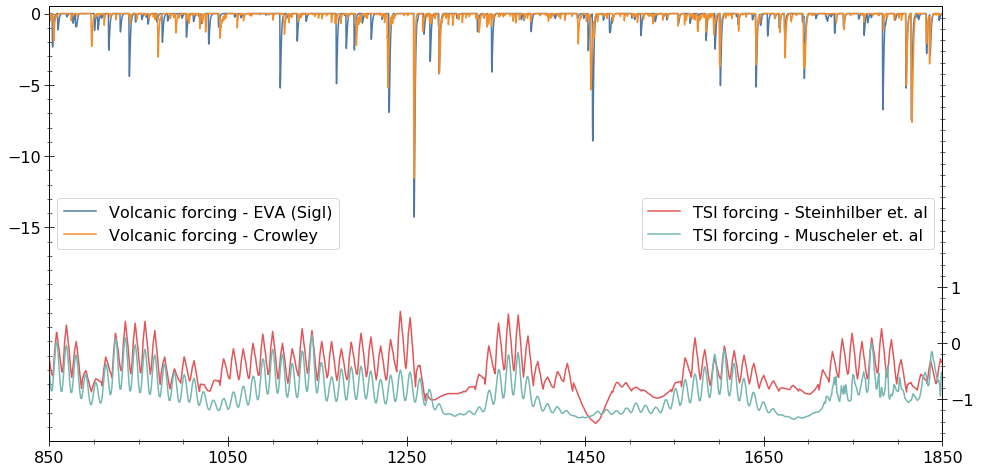

In [76]:
matplotlib.rcParams['lines.linewidth']=1.5
fig,ax=plt.subplots(1,1,figsize=(16,8))
ax.set_xlim(850,1850),ax.set_xticks(np.linspace(850,1850,6))
ax2=plt.twinx()
#plt.savefig('GFI_Talk/Period_empty.eps',format='EPS',bbox_inches='tight')
ax.set_ylim(-30,0.5),ax.set_yticks(np.linspace(-15,0,4))
ax.plot(EVA_time,EVA_forcing,label='Volcanic forcing - EVA (Sigl)',c='#4e79a7')
ax.plot(CRW_time,CRW_forcing,label='Volcanic forcing - Crowley',c='#f28e2b')
ax.legend(loc='center left',fontsize=16)
#plt.savefig('GFI_Talk/Period_Volc.eps',format='EPS',bbox_inches='tight')

ax2.plot(SBF_time,SBF_forcing-1366.14,label='TSI forcing - Steinhilber et. al',c='#e15759')
ax2.plot(VK_time,VK_forcing-1366.14,label='TSI forcing - Muscheler et. al',c='#76b7b2')
ax2.set_ylim(-1.75,6),ax2.set_yticks([-1,0,1])
ax2.legend(loc='center right',fontsize=16)
plt.savefig('GFI_Talk/Period_Volc_TSI.eps',format='EPS',bbox_inches='tight')

# Radiative forcing (Generator)

In [7]:
from lowEBMs.ForcingGenerator.VolcanicForcingGenerator import *
from lowEBMs.ForcingGenerator.VolcanicForcingGenerator1D import *
EVA_time,EVA_RF,EVA_AOD,EVA_Loc=Generator('Data/Sigl2015.csv',',',2,0,1,2,4,800,2000,10/365,5)
EVA_time_Synthetic,EVA_RF_Synthetic,EVA_AOD_Synthetic,EVA_Synthetic_Loc=Synthetic('Data/Sigl2015.csv',',',2,0,1,2,4,2000,3000,10/365,5,1000)

EVA_800_2000=np.column_stack((EVA_time,EVA_RF,EVA_AOD))
EVA_2000_3000=np.column_stack((EVA_time_Synthetic,EVA_RF_Synthetic,EVA_AOD_Synthetic))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[<matplotlib.lines.Line2D object at 0x7f10440975f8>, <matplotlib.lines.Line2D object at 0x7f1044097c50>, <matplotlib.collections.PathCollection object at 0x7f104400fb70>, <matplotlib.collections.PathCollection object at 0x7f104400f828>, <matplotlib.collections.PathCollection object at 0x7f104400f940>]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


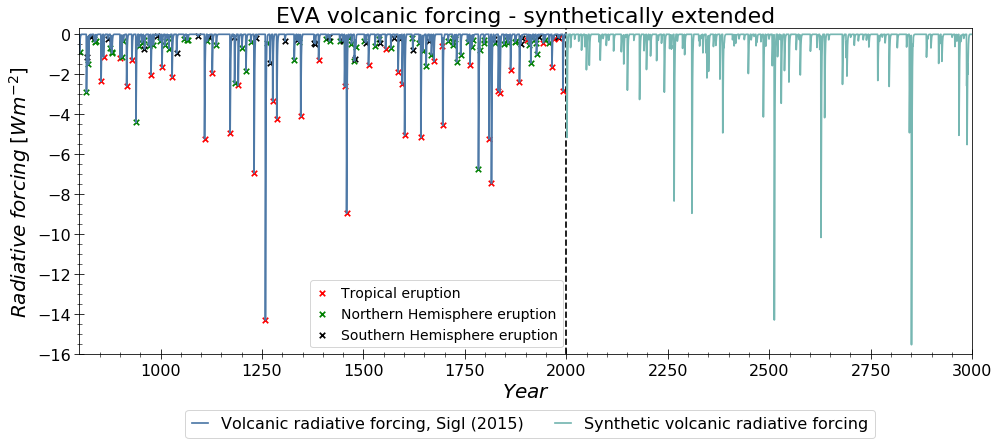

In [60]:
fig,ax=plt.subplots(figsize=(16,6))
Troptime,Trop_RF=EVA_Loc[0]
NHtime,NH_RF=EVA_Loc[1]
SHtime,SH_RF=EVA_Loc[2]

Troptime_Synthetic,Trop_RF_Synthetic=EVA_Synthetic_Loc[0]
NHtime_Synthetic,NH_RF_Synthetic=EVA_Synthetic_Loc[1]
SHtime_Synthetic,SH_RF_Synthetic=EVA_Synthetic_Loc[2]

P1=plt.plot(EVA_time,EVA_RF,label='Volcanic radiative forcing, Sigl (2015)',c='#4e79a7')
P2=plt.plot(EVA_time_Synthetic,EVA_RF_Synthetic,label='Synthetic volcanic radiative forcing',c='#76b7b2')

S1=plt.scatter(Troptime,Trop_RF,marker='x',s=30,c='r',label='Tropical eruption')
S2=plt.scatter(NHtime,NH_RF,marker='x',s=30,c='green',label='Northern Hemisphere eruption')
S3=plt.scatter(SHtime,SH_RF,marker='x',s=30,c='k',label='Southern Hemisphere eruption')

#plt.scatter(Troptime_Synthetic,Trop_RF_Synthetic,marker='x',s=30,c='r')
#plt.scatter(NHtime_Synthetic,NH_RF_Synthetic,marker='x',s=30,c='green')
#plt.scatter(SHtime_Synthetic,SH_RF_Synthetic,marker='x',s=30,c='k')
handles,labels=ax.get_legend_handles_labels()
print(handles)
leg1=plt.legend(handles[:2],labels[:2],fontsize=16,ncol=2,loc='lower right',bbox_to_anchor=(0.9,-0.28),handlelength=1)
leg2=plt.legend(handles[2:],labels[2:],fontsize=14,loc='lower center',bbox_to_anchor=(0.4,0),handlelength=1)
ax.add_artist(leg1)
plt.xlim(800,3000),plt.ylim(-16,0.3)
plt.xlabel('$Year$'),plt.ylabel('$Radiative\; forcing\; [Wm^{-2}]$')
plt.vlines(2000,-20,3,linestyle='--')
plt.title('EVA volcanic forcing - synthetically extended',fontsize=22)
plt.savefig('Plots/EVA_extended.eps',format='eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


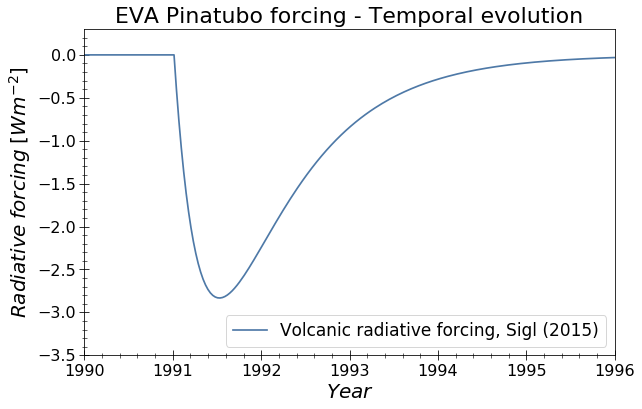

In [67]:
fig,ax=plt.subplots(1,1,figsize=(9.5,6))

ax.plot(EVA_time,EVA_RF,label='Volcanic radiative forcing, Sigl (2015)',c='#4e79a7')
ax.legend(fontsize=17,loc='lower right')
ax.set_xlim(1990,1996),ax.set_ylim(-3.5,0.3)
ax.set_xlabel('$Year$'),ax.set_ylabel('$Radiative\; forcing\; [Wm^{-2}]$')
ax.set_title('EVA Pinatubo forcing - Temporal evolution',fontsize=22)
plt.savefig('Plots/Temporal_evolution_EVA.eps',format='eps',bbox_inches='tight')

In [10]:
tprod=180
tloss=330
tmix_av=15*365/12
tres_av=17*365/12
lat=np.linspace(-85,85,18)
std_ET=18
mean_ET=45
std_EQ=18
mean_EQ=0
aod_nonlin=0.0784
aod_lin=0.0364
aod_RF=-20
EVA_1D_time,EVA_1D_RF,EVA_1D_AOD=Generator1D('Data/Sigl2015.csv',',',2,0,1,2,4,1900,2000,1/365,5\
                 ,tprod,tloss,tmix_av,tres_av,lat,std_ET,mean_ET,std_EQ,mean_EQ,aod_lin,aod_nonlin,aod_RF)

(18, 36500)


<Figure size 864x360 with 0 Axes>

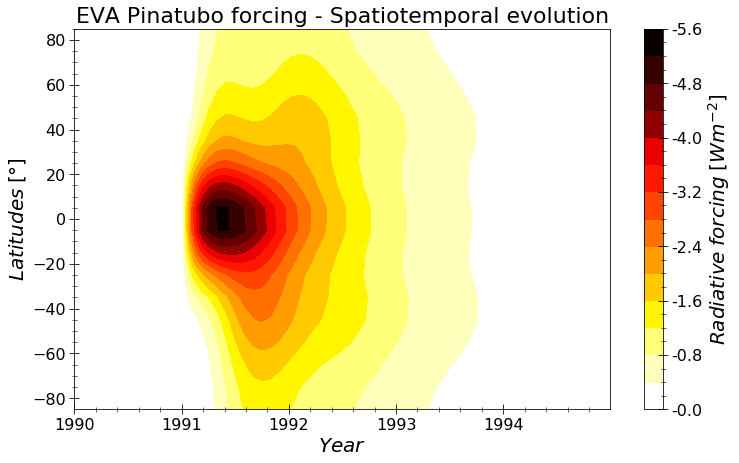

In [65]:
AOD_trans=np.transpose(EVA_1D_AOD)
RF_trans=np.transpose(EVA_1D_RF)
#print(M1D)
fig=plt.figure(figsize=(12,5))
#plt.plot(lat,data[2])
#print(len(data[0]),len(lat),data[2][:])
print(np.shape(AOD_trans))
#plt.xlim(1991,1995)
fig, ax = plt.subplots(figsize=(12,7))
plot=plt.contourf(EVA_1D_time[-365*10:-365*5],lat,AOD_trans[:,-365*10:-365*5],levels=14,cmap=plt.cm.get_cmap('hot_r',16))
cbar=fig.colorbar(plot)
cbar.set_label('$Radiative\; forcing\; [Wm^{-2}]$')
labels = [item.get_text() for item in cbar.ax.get_yticklabels()]
for k in range(len(labels)):
    labels[k]=str(np.round(float(labels[k])*(-20),2))
#print(labels)

cbar.ax.set_yticklabels(labels)
#cbar.set_ticks([0,-2,-4])
#plt.clim(-6,0)
ax.set_title('EVA Pinatubo forcing - Spatiotemporal evolution',fontsize=22)
ax.set_xlabel('$Year$')
ax.set_ylabel('$Latitudes\;[°]$')
plt.savefig('Plots/Spatiotemporal_evolution_EVA.eps',format='eps',bbox_inches='tight')

# Ensemble run

In [2]:
configFuncDiff_CTRL=importer('Data/DifferentRout_Pinatubo_CTRL.ini')

setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configFuncDiff_CTRL,parallel=True,parallel_config=setup,control=True)
print(builtins.eq_condition_amplitude)
configFuncDiff_CTRL,ParasCTRL=add_sellersparameters(configFuncDiff_CTRL,parameterinterpolatorstepwise,'SellersParameterization.ini',5,0,True,True)

Func1_4=np.array([[True,False,False,False],[False,True,False,False],[False,False,True,False],[False,False,False,True]])
for i in range(1,5):
    configFuncDiff_CTRL['funccomp']['funcparam']['func'+str(i)]['activation']=Func1_4[i-1]
FuncDiff=rk4alg(model_equation,configFuncDiff_CTRL['eqparam'],configFuncDiff_CTRL['rk4input'],configFuncDiff_CTRL['funccomp'])

Loading Configuration from: GFI_Talk/Data/DifferentRout_Pinatubo_CTRL.ini
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.
0.001
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini


1000
0.2210423402771324
1000
0.05236160589694536
1000
0.05219993292980017
1000
0.03607588588914326
1000
0.023095605455999518
1000
0.014484909379807783
1000
0.009032045316680075
1000
0.005622955232781067
1000
0.0034992479220466626
1000
0.0021775116892403822
1000
0.0013550533190156918
1000
0.000843269962474971
1000
0.02373832899997214
1000
0.0005247934965645359
1000
0.018701085720427862
1000
0.0003266016188107637
1000
0.014732811117452681
1000
0.0002032607597317071
1000
0.011606629228252896
1000
0.00012650047968080906
1000
0.009143825644202703
1000
7.872867856622293e-05
1000
0.007203620303297354
1000
4.8997634124956475e-05
1000
0.0056751130786532634
1000
3.0494260687467072e-05
1000
0.0044709403759453595
1000
1.8978489214403973e-05
1000
0.0035222789815985475
1000
1.1811512083909398e-05
1000
0.0027749108132208186
1000
7.3510532620603e-06
1000
0.002186123165923698
1000
4.57502801527249e-06
1000
0.0017222669788232651
1000
2.8473315650953766e-06
1000
0.0013568333864981805
1000
1.7720760901328

In [4]:
print(Vars.T_global)

[281.8992703  281.24718317 283.82755107 281.99214647]


False


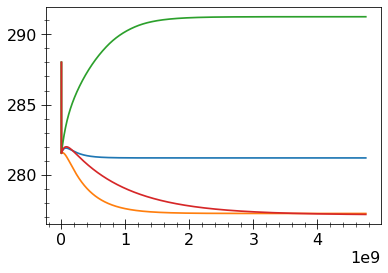

In [3]:
plt.plot(FuncDiff[0],FuncDiff[2])
print(eq_condition)

In [5]:
#from lowEBMs.Packages.Optimization import reshape_parameters, add_parameters
configFuncDiff=importer('Data/DifferentRout_Pinatubo.ini')

setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configFuncDiff,parallel=True,parallel_config=setup)

configFuncDiff,ParasCTRL=add_sellersparameters(configFuncDiff,parameterinterpolatorstepwise,'SellersParameterization.ini',5,0,True,True)

Func1_4=np.array([[True,False,False,False],[False,True,False,False],[False,False,True,False],[False,False,False,True]])
for i in range(1,5):
    configFuncDiff['funccomp']['funcparam']['func'+str(i)]['activation']=Func1_4[i-1]

Vars.T,Vars.T_global=FuncDiff[1][-1],FuncDiff[2][-1]
Data=rk4alg(model_equation,configFuncDiff['eqparam'],configFuncDiff['rk4input'],configFuncDiff['funccomp'])

Loading Configuration from: GFI_Talk/Data/DifferentRout_Pinatubo.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini


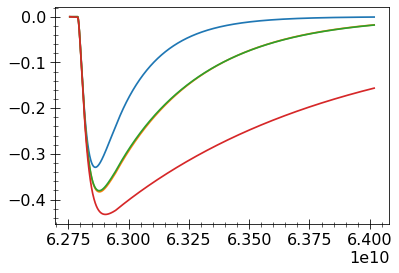

In [6]:
plt.plot(Data[0],Data[2]-Data[2][0])